In [7]:
%matplotlib inline

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import statsmodels.stats.api as sms
import scipy as sp
import scipy.stats
import csv

def summarize_experiment(file_name):
    #run_dirs = glob.glob(os.path.join(os.getcwd()) + '/*/')
    #run_files = [os.path.join(run_dir, 'stats_run.csv') for run_dir in run_dirs]
    df = pd.read_csv(os.path.join(os.getcwd(),file_name))
    rows = df.values.tolist()
    summary = []
    for row in rows:
        steps_mean, steps_lower, steps_higher = mean_confidence_interval(row[1:])
        summary.append([row[0], steps_mean, steps_lower, steps_higher])
    header = ['episode', 'steps_mean', 'steps_lower', 'steps_upper']
    try:
        with open(os.path.join(os.getcwd(), file_name[:-4] +'_summary.csv'), 'w') as csvfile:
            writer = csv.writer(csvfile, dialect='excel', quoting=csv.QUOTE_NONNUMERIC)
            writer.writerow(header)
            for data in summary:
                writer.writerow(data)
    except IOError as e:
        print("Can't write stats file - %s " % str(e))
    
def mean_confidence_interval(my_list, confidence=0.95):
    my_array = 1.0 * np.array(my_list)
    array_mean, array_se = np.mean(my_array), scipy.stats.sem(my_array)
    margin = array_se * sp.stats.t._ppf((1 + confidence) / 2.,
                                        len(my_array) - 1)
    return array_mean, array_mean - margin, array_mean + margin

def plot_steps(file_name):
    df = pd.read_csv(os.path.join(os.getcwd(), file_name))
    df = df.iloc[::10, :]
    factors = ['steps']
    colors = ['blue']
    for factor, color in zip(factors, colors):
        plt.figure(figsize=(10, 6), dpi=80)
        plt.plot(df['episode'], df[factor + '_mean'],
                 label=factor+'_mean', color=color, linewidth=2.0)
        plt.plot(df['episode'], df[factor + '_lower'],
                 label=factor+'_lower', color=color, linewidth=1.0, alpha=0.2)
        plt.plot(df['episode'], df[factor + '_upper'],
                 label=factor+'_upper', color=color, linewidth=1.0, alpha=0.2)
        plt.fill_between(df['episode'], df[factor + '_mean'],
                         df[factor + '_lower'],
                         facecolor=color, alpha=0.2)
        plt.fill_between(df['episode'], df[factor + '_mean'],
                         df[factor + '_upper'],
                         facecolor=color, alpha=0.2)
        plt.ylabel(factor, fontsize=20, fontweight='bold')
        plt.xlabel('episodes', fontsize=20, fontweight='bold')
        plt.legend(fontsize=14)
        plt.savefig(os.path.join(os.getcwd(), file_name[:-4] + '.png'), bbox_inches='tight')
        plt.show()
        
def plot_compare(experiment):
    df1 = pd.read_csv(os.path.join(os.getcwd(), 'testSemOptionMapa' + str(experiment) + '_experimento_1_summary.csv'))
    df1 = df1.iloc[::10, :]
    df2 = pd.read_csv(os.path.join(os.getcwd(), 'testComOptionMapa' + str(experiment) + '_experimento_1_summary.csv'))
    df2 = df2.iloc[::10, :]
    plt.figure(figsize=(10, 6), dpi=80)
    plt.plot(df1['episode'], df1['steps_mean'],
             label='Q-Learning', color='blue', linewidth=2.0)
    plt.plot(df1['episode'], df1['steps_lower'], color='blue', linewidth=1.0, alpha=0.2, label='_nolegend_')
    plt.plot(df1['episode'], df1['steps_upper'], color='blue', linewidth=1.0, alpha=0.2, label='_nolegend_')
    plt.fill_between(df1['episode'], df1['steps_mean'], df1['steps_lower'],
                     facecolor='blue', alpha=0.2)
    plt.fill_between(df1['episode'], df1['steps_mean'], df1['steps_upper'],
                     facecolor='blue', alpha=0.2)
    
    plt.plot(df2['episode'], df2['steps_mean'],
             label='PCO', color='green', linewidth=2.0)
    plt.plot(df1['episode'], df2['steps_lower'], color='green', linewidth=1.0, alpha=0.2, label='_nolegend_')
    plt.plot(df1['episode'], df2['steps_upper'], color='green', linewidth=1.0, alpha=0.2, label='_nolegend_')
    plt.fill_between(df2['episode'], df2['steps_mean'], df2['steps_lower'],
                     facecolor='green', alpha=0.2)
    plt.fill_between(df2['episode'], df2['steps_mean'], df2['steps_upper'],
                     facecolor='green', alpha=0.2)
    plt.ylabel('average discounted reward', fontsize=20, fontweight='bold')
    plt.xlabel('episodes', fontsize=20, fontweight='bold')
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.legend(fontsize=20, loc=4)
    plt.savefig(os.path.join(os.getcwd(), 'Mapa' + str(experiment) + '_compare.png'), bbox_inches='tight')
    plt.show()

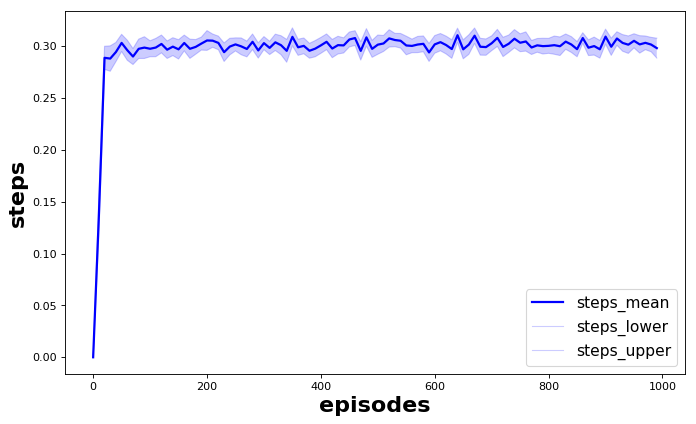

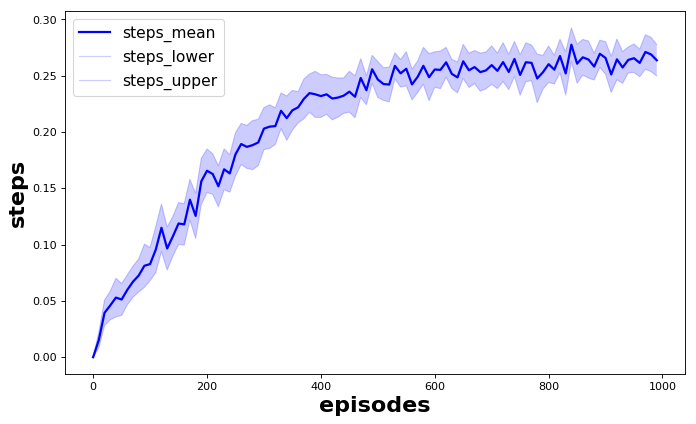

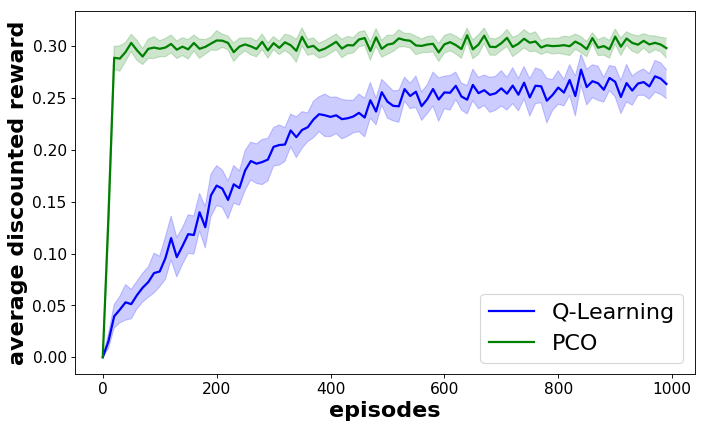

In [8]:
file_name = 'testComOptionMapa'

for i in [1]:
    summarize_experiment(file_name + str(i) + '_experimento_1.csv')
    plot_steps(file_name + str(i) + '_experimento_1_summary.csv')
file_name = 'testSemOptionMapa'
for i in [1]:
    summarize_experiment(file_name + str(i) + '_experimento_1.csv')
    plot_steps(file_name + str(i) + '_experimento_1_summary.csv')


for i in [1]:
    plot_compare(i)